In [152]:
import io
import random
import string
import warnings
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings('ignore')


import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *


# sklearn imports
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics


# python imports
import re
import json
import os
from collections import Counter
import datetime as dt


# Visualization
from matplotlib import pyplot as plt
from matplotlib import ticker
import seaborn as sns
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
# from wordcloud import WordCloud
from tqdm import tqdm_notebook


# Saving models
import pickle

In [153]:
def readData(data_dir):
    tweets = []
    for file in sorted(os.listdir(data_dir)):
        tweets.append(pd.read_csv(data_dir + '/' + file, lineterminator = '\n'))
    df = pd.concat(tweets)
    return df

In [154]:
def getCountryData(df,country_code):
    return df[df['country_code']=='IN']

### Adding date column in indian dataset

In [155]:
def addDate(df):
    date=[]
    for key,value in df.iterrows():
        date.append(value['created_at'][:10])
    df['date']=date
    return df

In [156]:
def processTweetText(df):
    '''
    Step 1- remove links
    Step 2- lower case
    Step 3- remove punctuation
    Step 4- remove stop words
    '''
    stop_words = set(stopwords.words('english'))
    stop_words.update(['#coronaupdate','#corona','#stayhomestaysafe','#stayhomeandstaysafe','#stayathomeandstaysafe','#stayhomesavelives','#stayhome','#coronavirus', '#coronavirusoutbreak', '#coronavirusPandemic', '#covid19', '#covid_19', '#epitwitter', '#ihavecorona', 'amp', 'coronavirus', 'covid19'])
    
    df['text'] = df['text'].apply(lambda x: re.sub(r"https\S+","",str(x)))
    df['text'] = df['text'].apply(lambda x: x.lower())
    df['text'] = df['text'].apply(lambda x: x.translate(str.maketrans("","",string.punctuation)))
    df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
    
    return df

### Sentiment analysis of processed tweets

In [157]:
def sentimentAnalysis(df):
    #4 new columns added to dataframe-> neg,neu,pos,compound
    sid = SentimentIntensityAnalyzer()
    sentiment_scores = df['text'].apply(lambda x: sid.polarity_scores(x))
    sent_scores_df = pd.DataFrame(list(sentiment_scores))
    df_new = pd.concat([df.reset_index(drop=True), sent_scores_df.reset_index(drop=True)], axis=1)
    df_new['value']=df_new['compound'].apply(lambda x : 'neutral' if (x>-0.1 and x<0.1) else ('positive' if x>=0.1 else 'negative'))
    return df_new

In [158]:
def prepareResult(df):
    result={}
    for key,value in df.iterrows():
        if value['date'] in result.keys():
            result[value['date']][value['value']]+=1
            result[value['date']]['total']+=1
        else:
            result[value['date']]={'negative':0,'neutral':0,'positive':0,'total':0}
    percentage={}
    for date in result.keys():
        percentage[date]={'negative':0,'neutral':0,'positive':0}
        percentage[date]['negative']= result[date]['negative']/result[date]['total']
        percentage[date]['neutral']= result[date]['neutral']/result[date]['total']
        percentage[date]['positive']= result[date]['positive']/result[date]['total']
    return [result,percentage]

### Plotting the graph

In [159]:
def plotGraph(percentage):
    x=[]
    pos=[]
    neg=[]
    neu=[]
    for date in percentage.keys():
        x.append(date)
        pos.append(percentage[date]['positive'])
        neg.append(percentage[date]['negative'])
        neu.append(percentage[date]['neutral'])

    plt.plot(x,pos, label='positive',color='green')
    plt.plot(x,neg, label='negative',color='red')
    plt.plot(x,neu, label='neutral',color='blue')
    plt.xlabel('Date')
    plt.ylabel('percentage')
    plt.title("Sentiment Analysis of Tweets in India")
    plt.legend()
    plt.show()

In [161]:
def driverFunction():
    dataset =readData(r'D:\Kartik_PersonalData\IBM_Hackathon\data')
    indian_dataset = getCountryData(dataset,'IN')
    indian_dataset = addDate(indian_dataset)
    indian_tweets = indian_dataset[['text','date']]
    indian_tweets_processed = processTweetText(indian_tweets)
    indian_tweets_sentiments = sentimentAnalysis(indian_tweets_processed)
    results,percentage = prepareResult(indian_tweets_sentiments)
    plotGraph(percentage)

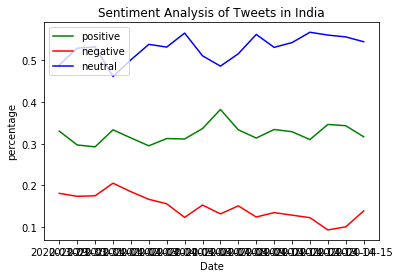

128.46007776260376


In [163]:
import time
start=time.time()
driverFunction()
end=time.time()
print(end-start)